In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, butter, lfilter
import noisereduce as nr
import librosa
import librosa.display
import soundfile as sf

/home/vodanhday/VSCode/Project_On_Lab/Speech_To_Text/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
audio_path = "recorded_audio.wav"
audio, sr = librosa.load(audio_path, sr=None)

## Waveform 

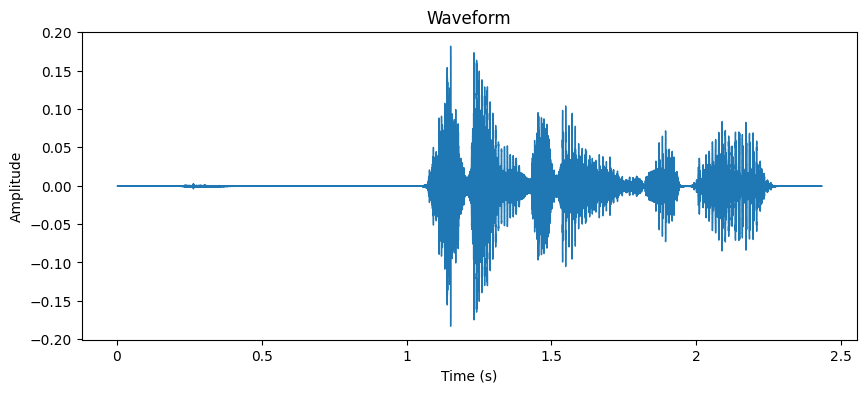

In [3]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

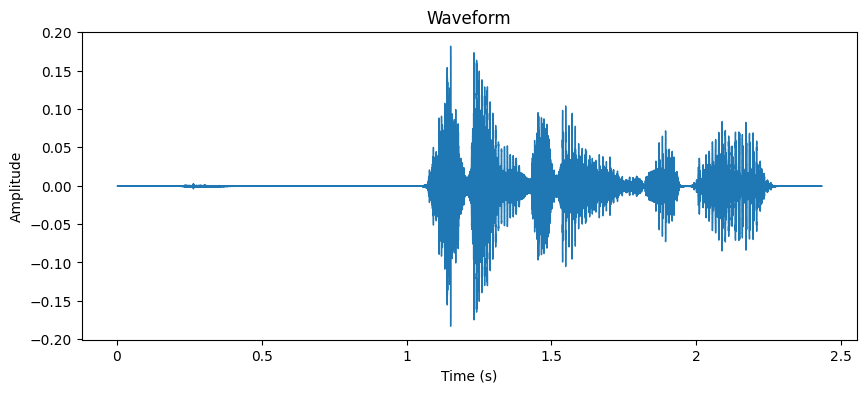

In [8]:
mono_audio = librosa.to_mono(audio)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(mono_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

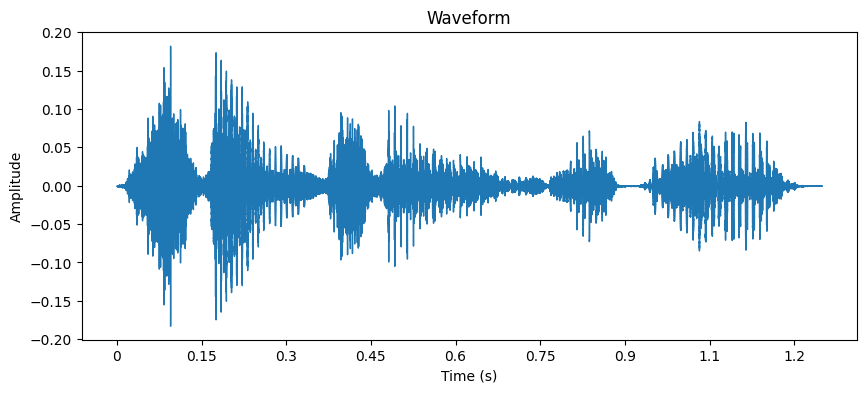

In [16]:
trimmed_audio, trimmed_sr = librosa.effects.trim(mono_audio, top_db=20)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(trimmed_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

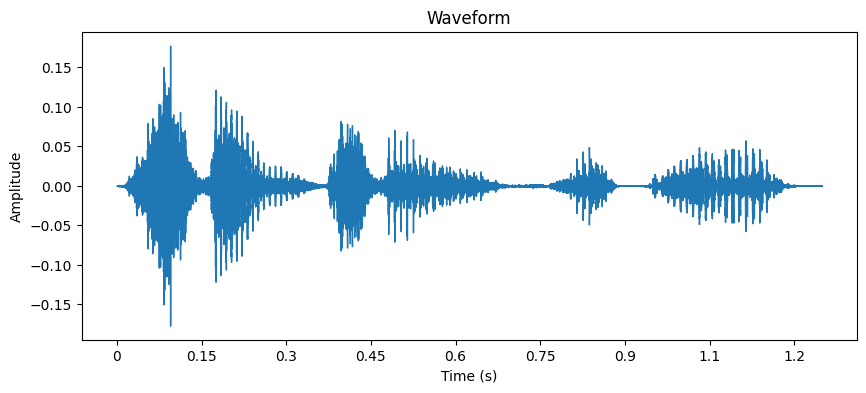

In [11]:
noisereduce_audio = nr.reduce_noise(y=trimmed_audio, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(noisereduce_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

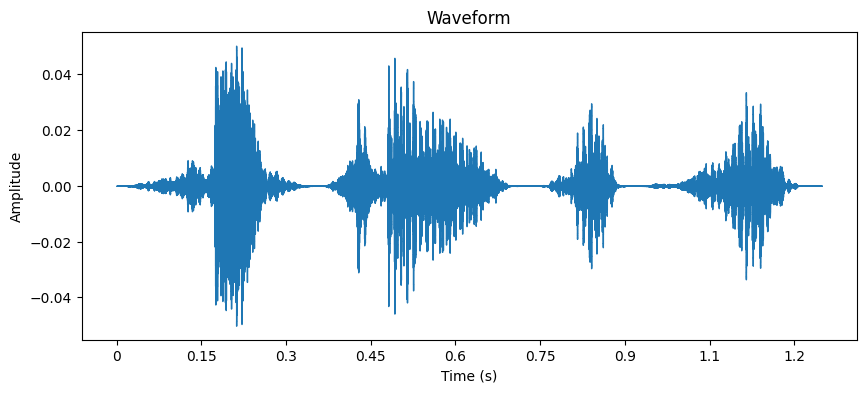

In [13]:
lowcut=300
highcut=3400
order = 5

nyquist = 0.5 * sr
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
bandpass_audio = lfilter(b, a, noisereduce_audio)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(bandpass_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

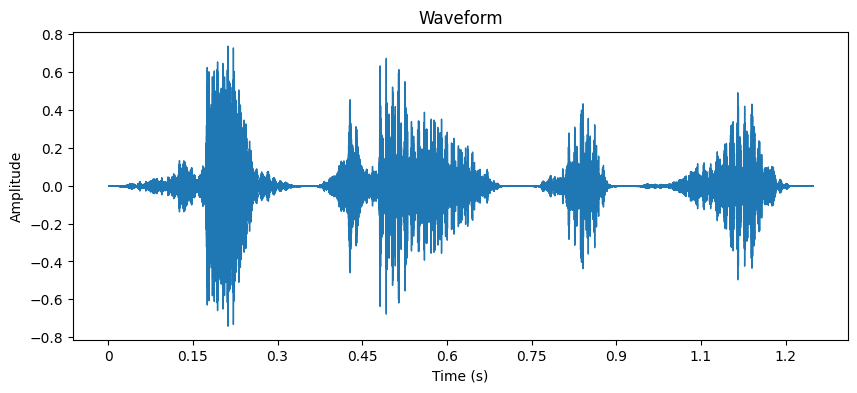

In [14]:
target_rms = 0.1

rms = np.sqrt(np.mean(bandpass_audio**2))
gain = target_rms / rms
normalize_audio = bandpass_audio * gain

plt.figure(figsize=(10, 4))
librosa.display.waveshow(normalize_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

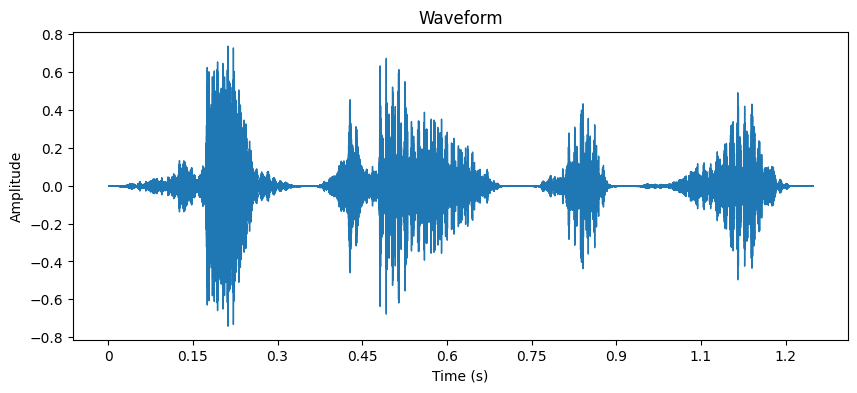

In [17]:
resample_audio = librosa.resample(normalize_audio, orig_sr=sr, target_sr=16000)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(resample_audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [19]:
sf.write("processed_audio.wav", resample_audio, sr)

## Spectrogram

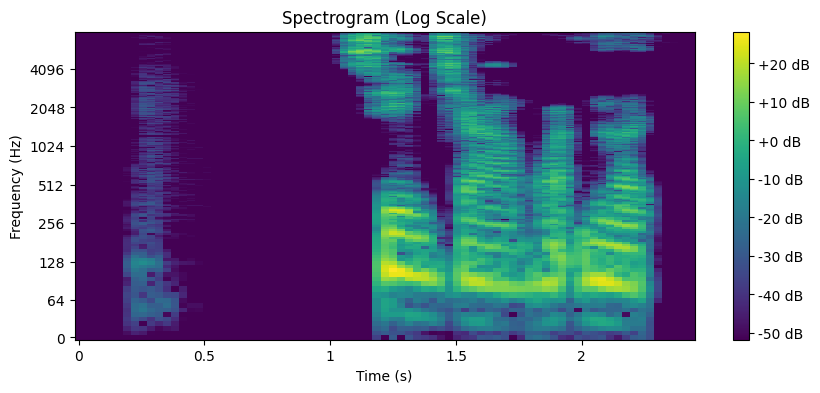

In [5]:
# Tạo spectrogram
stft = librosa.stft(audio)  # Short-Time Fourier Transform
spectrogram = librosa.amplitude_to_db(np.abs(stft))

# Vẽ spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (Log Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

## Mel-Spectrogram

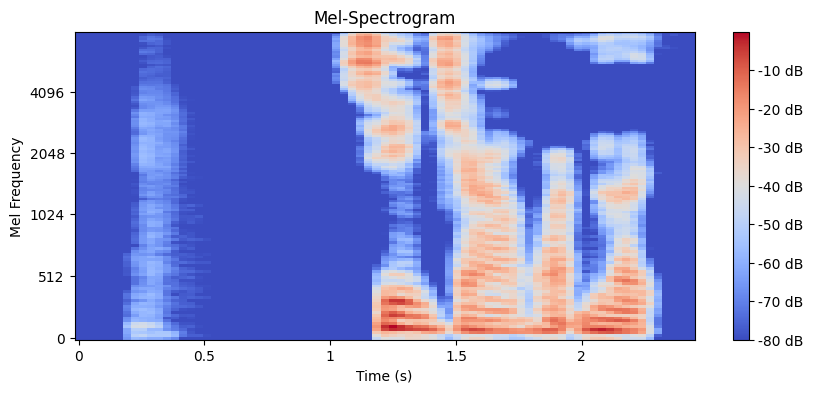

In [6]:
# Tạo Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Vẽ Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.show()

## Frequency Peaks

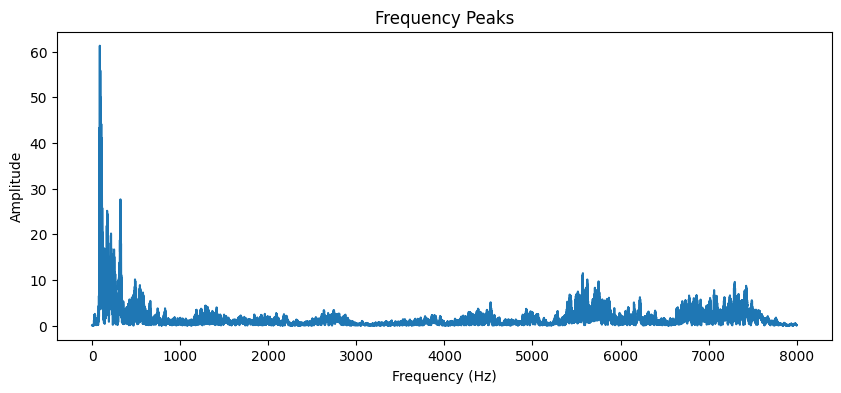

In [7]:
fft = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(fft), 1/sr)
magnitude = np.abs(fft)

# Tìm đỉnh tần số
peaks, _ = find_peaks(magnitude[:len(magnitude)//2], height=1000)  # Chỉ lấy nửa đầu (tần số dương)

# Vẽ tần số
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.scatter(frequencies[peaks], magnitude[peaks], color='red')
plt.title("Frequency Peaks")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()